In [18]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [10]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
#    -O /tmp/sarcasm.json

In [11]:
root = r'D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course3_NLP'

In [12]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [13]:
with open(root + "/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
training_labels_array = np.array(training_labels)
testing_labels_array = np.array(testing_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 50
history = model.fit(training_padded, training_labels_array, epochs=num_epochs, validation_data=(testing_padded, testing_labels_array), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 8s 406us/sample - loss: 0.4731 - accuracy: 0.7635 - val_loss: 0.4195 - val_accuracy: 0.8067
Epoch 2/50
20000/20000 [==============================] - 7s 343us/sample - loss: 0.3601 - accuracy: 0.8379 - val_loss: 0.4011 - val_accuracy: 0.8182
Epoch 3/50
20000/20000 [==============================] - 6s 316us/sample - loss: 0.3196 - accuracy: 0.8585 - val_loss: 0.4088 - val_accuracy: 0.8176
Epoch 4/50
20000/20000 [==============================] - 6s 301us/sample - loss: 0.2851 - accuracy: 0.8751 - val_loss: 0.4012 - val_accuracy: 0.8229
Epoch 5/50
20000/20000 [==============================] - 6s 292us/sample - loss: 0.2502 - accuracy: 0.8918 - val_loss: 0.4308 - val_accuracy: 0.8229
Epoch 6/50
20000/20000 [==============================] - 6s 293us/sample - loss: 0.2155 - accuracy: 0.9104 - val_loss: 0.4529 - val_accuracy: 0.8155
Epoch 7/50
20000/20000 [===========================

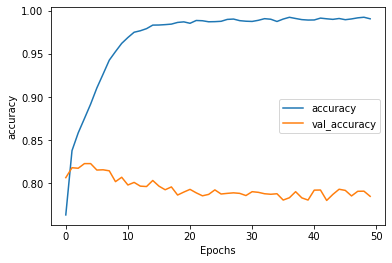

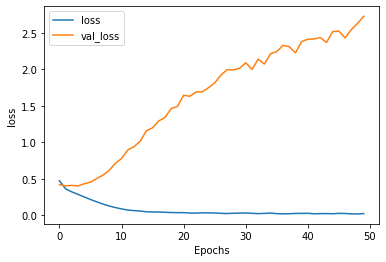

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [23]:
model.save(root + "test.h5")